#Comparaciones de rentabilidades en instrumentos financieros reales.

Luis Lapo, Cristian Ojeda.

###Objetivos

Evaluar la sostenibilidad de una cartera de inversi√≥n inicial de USD 100000 gestionada bajo
 diferentes estrategias de asignaci√≥n de activos y rebalanceo (por ejemplo: 60% renta variable
 / 40% renta fija + reglas de rebalanceo), con el fin de determinar la capacidad del fondo para
 sostener los pagos mensuales de USD 1200 que recibe un jubilado durante un horizonte de
 largo plazo, maximizando la rentabilidad y minimizando el riesgo de agotamiento del capital.

 ‚Ä¢ Analizar la evoluci√≥n del capital del fondo ante distintos escenarios de mercado, tasas
 de retorno e inflaci√≥n, determinando el tiempo esperado de sostenibilidad.

 ‚Ä¢ Identificar la combinaci√≥n √≥ptima de activos y par√°metros de gesti√≥n que permitan
 garantizar un flujo de ingresos estable al beneficiario, preservando el valor real del
 capital en el tiempo.


## An√°lisis del Modelo de Simulaci√≥n de Cartera

Este notebook presenta un modelo de simulaci√≥n para evaluar la sostenibilidad de una cartera de inversi√≥n con retiros mensuales, considerando diferentes escenarios de inflaci√≥n y estrategias de rebalanceo. Los resultados de las simulaciones base se resumen en la tabla `resumen_df`, mientras que la simulaci√≥n Monte Carlo extendida se presenta en la tabla `resultados_mc`.

### Activos de la Cartera

La cartera de inversi√≥n simulada actualmente est√° compuesta por los siguientes activos, definidos en el c√≥digo usando sus tickers de Yahoo Finance:

*   **Acci√≥n 1 (AAPL):** Apple Inc. - Una acci√≥n de tecnolog√≠a de gran capitalizaci√≥n.
*   **Acci√≥n 2 (MSFT):** Microsoft Corporation - Otra acci√≥n l√≠der en el sector tecnol√≥gico.
*   **Bonos (IEF):** iShares 7-10 Year Treasury Bond ETF - Un fondo cotizado que invierte en bonos del Tesoro de EE. UU. con vencimientos entre 7 y 10 a√±os, representando la parte de renta fija de la cartera.

La asignaci√≥n inicial de la cartera se define por los `pesos_iniciales`, que actualmente est√°n configurados como 40% AAPL, 20% MSFT y 40% IEF, siguiendo una estrategia de 60% renta variable / 40% renta fija.

### Estrategias de Rebalanceo

El rebalanceo es el proceso de ajustar la cartera peri√≥dicamente para mantener la asignaci√≥n de activos deseada. El c√≥digo simula dos estrategias principales:

1.  **Rebalanceo por Tiempo (`estrategia="tiempo"`):** La cartera se rebalancea a la asignaci√≥n inicial (`pesos_iniciales`) en intervalos de tiempo fijos. En este caso, el rebalanceo se realiza cada `frecuencia_rebalanceo` meses (configurado actualmente a 3 meses, es decir, trimestralmente).

2.  **Rebalanceo por Umbral (`estrategia="umbral"`):** La cartera se rebalancea a la asignaci√≥n inicial solo cuando el peso de alg√∫n activo se desv√≠a de su peso objetivo inicial por m√°s de un `umbral_rebalanceo` (configurado actualmente al 5%). Esto significa que el rebalanceo ocurre de forma din√°mica en funci√≥n de los movimientos del mercado.

Ambas estrategias incurren un peque√±o `coste_transaccion` cada vez que se realiza un rebalanceo para simular los costos asociados a la compra y venta de activos.

### Funcionamiento del C√≥digo

El c√≥digo se estructura en varias partes clave:

1.  **Par√°metros Generales:** Define las variables de configuraci√≥n inicial como el capital inicial, el retiro mensual, los activos, los pesos, la frecuencia y umbral de rebalanceo, los costos de transacci√≥n y los escenarios de inflaci√≥n a simular.
2.  **Descarga de Datos:** Utiliza la librer√≠a `yfinance` para descargar los precios hist√≥ricos ajustados (o de cierre si no est√°n disponibles) de los activos seleccionados. Calcula los retornos mensuales a partir de estos precios.
3.  **Funci√≥n de Simulaci√≥n (`simular_fondo`):** Esta funci√≥n simula la evoluci√≥n del capital del fondo mes a mes. Toma como entradas los pesos iniciales, una tasa de inflaci√≥n anual, la estrategia de rebalanceo, la frecuencia (para rebalanceo por tiempo) y el umbral (para rebalanceo por umbral). En cada paso mensual, aplica los retornos del mercado, realiza el retiro correspondiente (ajustado por inflaci√≥n) y aplica la l√≥gica de rebalanceo si se cumplen las condiciones. Registra el capital, el retiro, el retorno, la inflaci√≥n y la estrategia en un historial.
4.  **Ejecuci√≥n de Simulaciones Base:** Llama a la funci√≥n `simular_fondo` para cada combinaci√≥n de escenario de inflaci√≥n y estrategia de rebalanceo definida, almacenando los resultados.
5.  **An√°lisis de Resultados Base:** Procesa los resultados de las simulaciones base para generar la tabla resumen (`resumen_df`), mostrando el tiempo que dur√≥ el fondo (hasta el final del per√≠odo hist√≥rico simulado) y el capital final para cada escenario.
6.  **Gr√°ficos Comparativos Base:** Genera gr√°ficos para visualizar la evoluci√≥n del capital y de los retiros mensuales a lo largo del tiempo para cada escenario base.
7.  **Simulaci√≥n Monte Carlo (`simular_montecarlo` y Escaneo):** Esta secci√≥n realiza una simulaci√≥n m√°s avanzada utilizando el m√©todo de Monte Carlo. La funci√≥n `simular_montecarlo` toma retornos hist√≥ricos y los muestrea aleatoriamente con reemplazo para crear `num_simulaciones` escenarios de rendimiento futuros posibles, cada uno con una duraci√≥n de `horizonte_meses`. Para cada simulaci√≥n, simula la evoluci√≥n del fondo mes a mes, aplicando retornos muestreados, realizando el retiro mensual ajustado por inflaci√≥n, y aplicando la estrategia de rebalanceo por tiempo. Registra si el fondo se agota antes del `horizonte_meses` y la duraci√≥n que alcanz√≥.
8.  **An√°lisis y Reporte de Resultados Monte Carlo:** Los resultados de las `num_simulaciones` para cada combinaci√≥n de capital inicial e inflaci√≥n se recopilan en la tabla `resultados_mc`. A partir de estos datos, se calculan y reportan dos m√©tricas clave:
    *   **Probabilidad de Sostenibilidad (‚â•25 a√±os):** Esta es la proporci√≥n de simulaciones en las que el fondo no se agot√≥ antes de alcanzar el `horizonte_anios` (25 a√±os). Se calcula como:

$$
P(\text{sostenibilidad}) =
\frac{\text{N√∫mero de simulaciones donde } Capital_{final} > 0}
     {\text{N√∫mero total de simulaciones}}
$$

Donde el "Capital final" se eval√∫a al final del `horizonte_anios`.

*   **Duraci√≥n Esperada (a√±os):** Es el promedio de la duraci√≥n que alcanz√≥ el fondo a trav√©s de todas las simulaciones. Si una simulaci√≥n no se agot√≥, su duraci√≥n se considera igual al `horizonte_anios`. Se calcula como:

$$
E(\text{Duraci√≥n}) = \frac{1}{\text{N√∫mero total de simulaciones}} \sum_{i=1}^{\text{N√∫mero total de simulaciones}} \text{Duraci√≥n de la simulaci√≥n } i
$$

        
     
 La duraci√≥n de cada simulaci√≥n $i$ es el n√∫mero de meses hasta el agotamiento o el `horizonte_meses`, convertido a a√±os.

  El c√≥digo luego genera gr√°ficos que visualizan la $P(\text{sostenibilidad})$ y $E(\text{Duraci√≥n})$ frente al Capital inicial para cada escenario de inflaci√≥n simulado.

  Finalmente, el c√≥digo identifica, para el escenario de inflaci√≥n del 3%, el `Capital inicial` dentro del rango `capitales` probado que result√≥ en la mayor `Probabilidad de sostenibilidad (‚â•25 a√±os)` seg√∫n los datos de `resultados_mc`. Este capital se reporta junto con su probabilidad de sostenibilidad y duraci√≥n esperada asociadas. Es importante notar que esto no es una optimizaci√≥n matem√°tica rigurosa para encontrar el capital m√≠nimo necesario, sino la identificaci√≥n del mejor desempe√±o observado dentro del conjunto discreto de capitales iniciales simulados.

En conjunto, el c√≥digo permite simular y analizar el rendimiento de una cartera de inversi√≥n bajo retiros constantes ajustados por inflaci√≥n, proporcionando informaci√≥n valiosa sobre la sostenibilidad del fondo y el impacto de diferentes par√°metros. La simulaci√≥n Monte Carlo ofrece una perspectiva probabil√≠stica sobre la viabilidad a largo plazo.

/tmp/ipython-input-54075747.py:45: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(activos.values()), start=start_date, end=end_date, progress=False)
/tmp/ipython-input-54075747.py:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample("M").last()


Inflaci√≥n anual Estrategia  A√±os sostenidos  Capital final ($)
0              0%     tiempo         9.916667      238772.770038
1              0%     umbral         9.916667      271140.132209
2              3%     tiempo         9.916667      192980.199194
3              3%     umbral         9.916667      223640.744537
4              5%     tiempo         9.916667      158973.256918
5              5%     umbral         9.916667      188411.865271

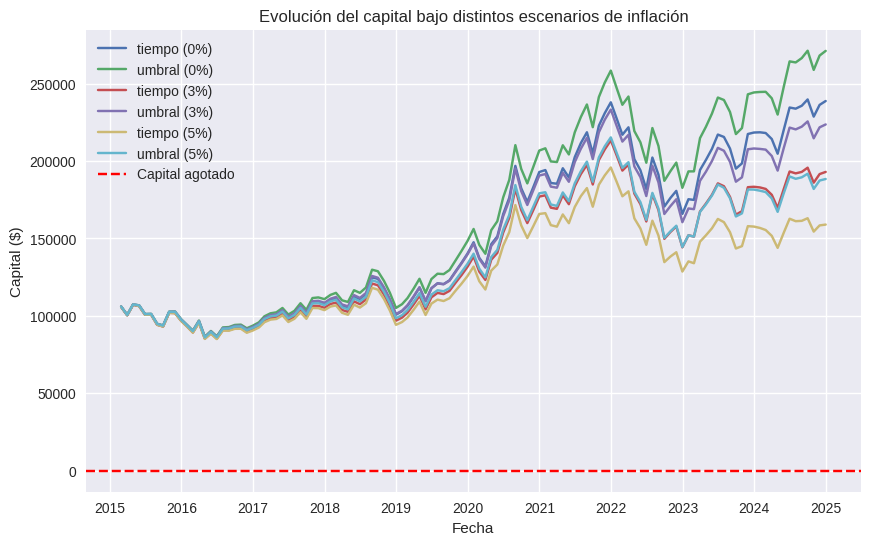

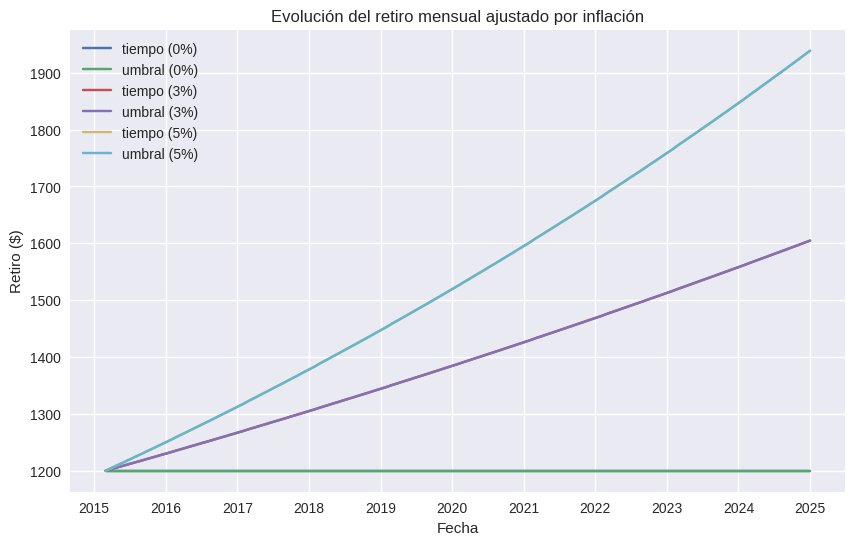


üìò Escenario: Inflaci√≥n 0% - Estrategia tiempo


Fecha        Capital  Retiro   Retorno  Inflaci√≥n Estrategia
0  2015-02-28  105849.428520  1200.0  0.072616        0.0     tiempo
1  2015-03-31  100422.230271  1200.0 -0.039936        0.0     tiempo
2  2015-04-30  107211.147695  1200.0  0.079553        0.0     tiempo
3  2015-05-31  106352.223025  1200.0  0.005169        0.0     tiempo
4  2015-06-30  100761.441645  1200.0 -0.041285        0.0     tiempo
5  2015-07-31  100868.219880  1200.0  0.012969        0.0     tiempo
6  2015-08-31   94324.812082  1200.0 -0.051100        0.0     tiempo
7  2015-09-30   93241.157342  1200.0  0.001233        0.0     tiempo
8  2015-10-31  102094.794297  1200.0  0.107824        0.0     tiempo
9  2015-11-30  101976.876528  1200.0  0.012600        0.0     tiempo
10 2015-12-31   97036.289035  1200.0 -0.036681        0.0     tiempo
11 2016-01-31   93289.905438  1200.0 -0.026242        0.0     tiempo


üìò Escenario: Inflaci√≥n 0% - Estrategia umbral


Fecha        Capital  Retiro   Retorno  Inflaci√≥n Estrategia
0  2015-02-28  106061.551623  1200.0  0.072616        0.0     umbral
1  2015-03-31  100625.882035  1200.0 -0.039936        0.0     umbral
2  2015-04-30  107431.000624  1200.0  0.079553        0.0     umbral
3  2015-05-31  106786.343146  1200.0  0.005169        0.0     umbral
4  2015-06-30  101177.638996  1200.0 -0.041285        0.0     umbral
5  2015-07-31  101289.814906  1200.0  0.012969        0.0     umbral
6  2015-08-31   94913.891223  1200.0 -0.051100        0.0     umbral
7  2015-09-30   93830.963084  1200.0  0.001233        0.0     umbral
8  2015-10-31  102748.195269  1200.0  0.107824        0.0     umbral
9  2015-11-30  102842.873153  1200.0  0.012600        0.0     umbral
10 2015-12-31   97870.520261  1200.0 -0.036681        0.0     umbral
11 2016-01-31   94102.245135  1200.0 -0.026242        0.0     umbral


üìò Escenario: Inflaci√≥n 3% - Estrategia tiempo


Fecha        Capital       Retiro   Retorno  Inflaci√≥n Estrategia
0  2015-02-28  105849.428520  1200.000000  0.072616       0.03     tiempo
1  2015-03-31  100419.270747  1202.959524 -0.039936       0.03     tiempo
2  2015-04-30  107202.026385  1205.926346  0.079553       0.03     tiempo
3  2015-05-31  106334.190216  1208.900486  0.005169       0.03     tiempo
4  2015-06-30  100732.271365  1211.881961 -0.041285       0.03     tiempo
5  2015-07-31  100823.800501  1214.870789  0.012969       0.03     tiempo
6  2015-08-31   94264.915584  1217.866988 -0.051100       0.03     tiempo
7  2015-09-30   93160.316388  1220.870576  0.001233       0.03     tiempo
8  2015-10-31  101981.355174  1223.881573  0.107824       0.03     tiempo
9  2015-11-30  101835.391559  1226.899995  0.012600       0.03     tiempo
10 2015-12-31   96870.067978  1229.925861 -0.036681       0.03     tiempo
11 2016-01-31   93095.087091  1232.959190 -0.026242       0.03     tiempo


üìò Escenario: Inflaci√≥n 3% - Estrategia umbral


Fecha        Capital       Retiro   Retorno  Inflaci√≥n Estrategia
0  2015-02-28  106061.551623  1200.000000  0.072616       0.03     umbral
1  2015-03-31  100622.922511  1202.959524 -0.039936       0.03     umbral
2  2015-04-30  107421.879314  1205.926346  0.079553       0.03     umbral
3  2015-05-31  106768.274199  1208.900486  0.005169       0.03     umbral
4  2015-06-30  101148.434069  1211.881961 -0.041285       0.03     umbral
5  2015-07-31  101245.360432  1214.870789  0.012969       0.03     umbral
6  2015-08-31   94853.841391  1217.866988 -0.051100       0.03     umbral
7  2015-09-30   93749.968607  1220.870576  0.001233       0.03     umbral
8  2015-10-31  102634.586069  1223.881573  0.107824       0.03     umbral
9  2015-11-30  102700.932426  1226.899995  0.012600       0.03     umbral
10 2015-12-31   97703.860164  1229.925861 -0.036681       0.03     umbral
11 2016-01-31   93906.999269  1232.959190 -0.026242       0.03     umbral


üìò Escenario: Inflaci√≥n 5% - Estrategia tiempo


Fecha        Capital       Retiro   Retorno  Inflaci√≥n Estrategia
0  2015-02-28  105849.428520  1200.000000  0.072616       0.05     tiempo
1  2015-03-31  100417.341322  1204.888949 -0.039936       0.05     tiempo
2  2015-04-30  107196.071999  1209.797815  0.079553       0.05     tiempo
3  2015-05-31  106322.402478  1214.726681  0.005169       0.05     tiempo
4  2015-06-30  100713.176620  1219.675628 -0.041285       0.05     tiempo
5  2015-07-31  100794.684166  1224.644738  0.012969       0.05     tiempo
6  2015-08-31   94225.598786  1229.634092 -0.051100       0.05     tiempo
7  2015-09-30   93107.177897  1234.643773  0.001233       0.05     tiempo
8  2015-10-31  101906.694784  1239.673865  0.107824       0.05     tiempo
9  2015-11-30  101742.152808  1244.724450  0.012600       0.05     tiempo
10 2015-12-31   96760.379543  1249.795611 -0.036681       0.05     tiempo
11 2016-01-31   92966.348808  1254.887433 -0.026242       0.05     tiempo


üìò Escenario: Inflaci√≥n 5% - Estrategia umbral


Fecha        Capital       Retiro   Retorno  Inflaci√≥n Estrategia
0  2015-02-28  106061.551623  1200.000000  0.072616       0.05     umbral
1  2015-03-31  100620.993087  1204.888949 -0.039936       0.05     umbral
2  2015-04-30  107415.924928  1209.797815  0.079553       0.05     umbral
3  2015-05-31  106756.462838  1214.726681  0.005169       0.05     umbral
4  2015-06-30  101129.316677  1219.675628 -0.041285       0.05     umbral
5  2015-07-31  101216.221156  1224.644738  0.012969       0.05     umbral
6  2015-08-31   94814.424032  1229.634092 -0.051100       0.05     umbral
7  2015-09-30   93696.729432  1234.643773  0.001233       0.05     umbral
8  2015-10-31  102559.814139  1239.673865  0.107824       0.05     umbral
9  2015-11-30  102607.393878  1244.724450  0.012600       0.05     umbral
10 2015-12-31   97593.882929  1249.795611 -0.036681       0.05     umbral
11 2016-01-31   93777.979765  1254.887433 -0.026242       0.05     umbral

In [2]:
# ======================================================================================
#  Simulaci√≥n actuarial con an√°lisis de sensibilidad a la inflaci√≥n
# ======================================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use("seaborn-v0_8")

# -------------------------------------------------------------------------------------
#  Par√°metros generales
# -------------------------------------------------------------------------------------

start_date = "2015-01-01"
end_date = "2025-01-01"

capital_inicial = 100000
retiro_mensual_inicial = 1200

# Estrategias de rebalanceo
frecuencia_rebalanceo = 3   # meses (trimestral)
umbral_rebalanceo = 0.05    # 5%
coste_transaccion = 0.002   # 0.2% por rebalanceo

# Activos elegidos (puedes cambiarlos libremente)
activos = {
    "Acci√≥n 1": "AAPL",
    "Acci√≥n 2": "MSFT",
    "Bonos": "IEF"
}

# Pesos iniciales (60% renta variable / 40% renta fija)
pesos_iniciales = np.array([0.4, 0.2, 0.4])

# Escenarios de inflaci√≥n anual (0%, 3%, 5%)
inflaciones = [0.00, 0.03, 0.05]

# -------------------------------------------------------------------------------------
# Descargar precios hist√≥ricos y calcular retornos mensuales
# -------------------------------------------------------------------------------------

data = yf.download(list(activos.values()), start=start_date, end=end_date, progress=False)


if isinstance(data.columns, pd.MultiIndex):
    if 'Adj Close' in data.columns.levels[0]:
        data = data['Adj Close']
    elif 'Close' in data.columns.levels[0]:
        data = data['Close']
    else:
        raise KeyError("Could not find 'Adj Close' or 'Close' column in downloaded data.")
else:
    if 'Adj Close' in data.columns:
        data = data['Adj Close']
    elif 'Close' in data.columns:
        data = data['Close']
    else:
        raise KeyError("Could not find 'Adj Close' or 'Close' column in downloaded data.")

data.columns = activos.keys()
data = data.resample("M").last()
retornos = data.pct_change().dropna()

# -------------------------------------------------------------------------------------
#  Funci√≥n de simulaci√≥n del fondo
# -------------------------------------------------------------------------------------

def simular_fondo(pesos_iniciales, inflacion_anual=0.02, estrategia="tiempo",
                  frecuencia=3, umbral=0.05):
    """
    Simula la evoluci√≥n del fondo con inflaci√≥n fija anual y estrategia de rebalanceo.
    """
    capital = capital_inicial
    retiro_mensual = retiro_mensual_inicial
    pesos = pesos_iniciales.copy()
    historial = []
    inflacion_mensual = (1 + inflacion_anual)**(1/12) - 1

    for i, fecha in enumerate(retornos.index):
        # Ajuste del retiro mensual por inflaci√≥n constante
        if i > 0:
            retiro_mensual *= (1 + inflacion_mensual)

        # Calcular retorno ponderado de la cartera
        r = np.dot(retornos.loc[fecha].values, pesos)
        capital *= (1 + r)
        capital -= retiro_mensual

        # Estrategia de rebalanceo
        if estrategia == "tiempo" and (i % frecuencia == 0):
            pesos = pesos_iniciales.copy()
            capital -= capital * coste_transaccion
        elif estrategia == "umbral":
            desv = np.abs((pesos - pesos_iniciales)/pesos_iniciales)
            if any(desv > umbral):
                pesos = pesos_iniciales.copy()
                capital -= capital * coste_transaccion

        # Guardar resultados
        historial.append({
            "Fecha": fecha,
            "Capital": capital,
            "Retiro": retiro_mensual,
            "Retorno": r,
            "Inflaci√≥n": inflacion_anual,
            "Estrategia": estrategia
        })

        # Si el fondo se agota, se detiene
        if capital <= 0:
            break

    return pd.DataFrame(historial)

# -------------------------------------------------------------------------------------
# Ejecutar simulaciones para todos los escenarios
# -------------------------------------------------------------------------------------

resultados = {}

for inflacion in inflaciones:
    df_tiempo = simular_fondo(pesos_iniciales, inflacion_anual=inflacion, estrategia="tiempo")
    df_umbral = simular_fondo(pesos_iniciales, inflacion_anual=inflacion, estrategia="umbral")
    resultados[(inflacion, "tiempo")] = df_tiempo
    resultados[(inflacion, "umbral")] = df_umbral

# -------------------------------------------------------------------------------------
#  An√°lisis de resultados
# -------------------------------------------------------------------------------------

resumen = []

for (inflacion, estrategia), df in resultados.items():
    anios = len(df)/12
    cap_final = df["Capital"].iloc[-1]
    resumen.append({
        "Inflaci√≥n anual": f"{inflacion*100:.0f}%",
        "Estrategia": estrategia,
        "A√±os sostenidos": anios,
        "Capital final ($)": cap_final
    })

resumen_df = pd.DataFrame(resumen)
display(resumen_df)

# -------------------------------------------------------------------------------------
#  Gr√°ficos comparativos
# -------------------------------------------------------------------------------------

# --- Evoluci√≥n del capital ---
plt.figure(figsize=(10,6))
for (inflacion, estrategia), df in resultados.items():
    plt.plot(df["Fecha"], df["Capital"], label=f"{estrategia} ({inflacion*100:.0f}%)")
plt.axhline(y=0, color="red", linestyle="--", label="Capital agotado")
plt.title("Evoluci√≥n del capital bajo distintos escenarios de inflaci√≥n")
plt.xlabel("Fecha")
plt.ylabel("Capital ($)")
plt.legend()
plt.grid(True)
plt.show()

# --- Evoluci√≥n del retiro mensual (ajustado por inflaci√≥n) ---
plt.figure(figsize=(10,6))
for (inflacion, estrategia), df in resultados.items():
    plt.plot(df["Fecha"], df["Retiro"], label=f"{estrategia} ({inflacion*100:.0f}%)")
plt.title("Evoluci√≥n del retiro mensual ajustado por inflaci√≥n")
plt.xlabel("Fecha")
plt.ylabel("Retiro ($)")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------------------------------------------------------------
# Tablas de evoluci√≥n (primeros meses)
# -------------------------------------------------------------------------------------

for (inflacion, estrategia), df in resultados.items():
    print(f"\n Escenario: Inflaci√≥n {inflacion*100:.0f}% - Estrategia {estrategia}")
    display(df.head(12))

# -------------------------------------------------------------------------------------
#  Conclusi√≥n
# -------------------------------------------------------------------------------------
# Este an√°lisis muestra:
# - C√≥mo la inflaci√≥n afecta la duraci√≥n del fondo y su capital final.
# - Que el rebalanceo trimestral y por umbral tienden a comportarse distinto bajo inflaci√≥n alta.
# - Que a mayor inflaci√≥n, se reduce la sostenibilidad promedio (en a√±os) del fondo.

## Conclusiones basadas en la tabla de resumen (`resumen_df`)

La tabla `resumen_df` muestra un resumen de la evoluci√≥n del capital de la cartera bajo diferentes escenarios de inflaci√≥n (0%, 3% y 5% anual) y dos estrategias de rebalanceo (por tiempo y por umbral) a lo largo del per√≠odo hist√≥rico de los datos (aproximadamente 10 a√±os, de 2015 a 2025).

Las principales conclusiones de esta tabla son:

*   **Todos los escenarios sobrevivieron el per√≠odo hist√≥rico:** En todas las combinaciones de inflaci√≥n y estrategia de rebalanceo simuladas, el fondo no se agot√≥ antes del final del per√≠odo de datos hist√≥ricos. La columna "A√±os sostenidos" muestra consistentemente el mismo valor (aproximadamente 9.92 a√±os), que corresponde a la duraci√≥n de los datos hist√≥ricos utilizados para la simulaci√≥n.

*   **La inflaci√≥n reduce significativamente el capital final:** Aunque el fondo no se agot√≥ en ninguno de los escenarios hist√≥ricos, la inflaci√≥n tuvo un impacto sustancial en la cantidad de capital restante al final del per√≠odo. A medida que aumenta la tasa de inflaci√≥n anual, el capital final disminuye notablemente. Esto se debe a que los retiros mensuales se ajustan por inflaci√≥n, lo que significa que la cantidad real retirada del fondo aumenta con el tiempo en escenarios de alta inflaci√≥n.

*   **La estrategia de rebalanceo por umbral tiende a dejar m√°s capital final:** Comparando las dos estrategias de rebalanceo dentro de cada escenario de inflaci√≥n, la estrategia por "umbral" (rebalanceo cuando la desviaci√≥n de pesos supera un 5%) result√≥ en un capital final consistentemente mayor que la estrategia basada en "tiempo" (rebalanceo trimestral). Esto sugiere que, para esta cartera y per√≠odo hist√≥rico, permitir que los activos se desv√≠en ligeramente antes de rebalancear fue m√°s beneficioso que rebalancear en intervalos fijos.

En resumen, si bien la cartera actual parece robusta frente a retiros fijos ajustados por inflaci√≥n durante un per√≠odo de 10 a√±os basado en datos hist√≥ricos recientes, la inflaci√≥n es un factor cr√≠tico que erosiona el capital. La estrategia de rebalanceo por umbral demostr√≥ ser m√°s efectiva en la preservaci√≥n del capital en este contexto hist√≥rico. Para evaluar la sostenibilidad a m√°s largo plazo, es fundamental recurrir a m√©todos como la simulaci√≥n Monte Carlo, que ya se ha explorado en la secci√≥n `resultados_mc`.

Inflaci√≥n anual  Capital inicial  \
0               0%            50000   
1               0%            60000   
2               0%            70000   
3               0%            80000   
4               0%            90000   
5               0%           100000   
6               0%           110000   
7               0%           120000   
8               0%           130000   
9               0%           140000   
10              0%           150000   
11              0%           160000   
12              0%           170000   
13              0%           180000   
14              0%           190000   
15              0%           200000   
16              3%            50000   
17              3%            60000   
18              3%            70000   
19              3%            80000   
20              3%            90000   
21              3%           100000   
22              3%           110000   
23              3%           120000   
24              3%           130000   
25              3%           140000   
26              3%           150000   
27              3%           160000   
28              3%           170000   
29              3%           180000   
30              3%           190000   
31              3%           200000   
32              5%            50000   
33              5%            60000   
34              5%            70000   
35              5%            80000   
36              5%            90000   
37              5%           100000   
38              5%           110000   
39              5%           120000   
40              5%           130000   
41              5%           140000   
42              5%           150000   
43              5%           160000   
44              5%           170000   
45              5%           180000   
46              5%           190000   
47              5%           200000   

    Probabilidad de sostenibilidad (‚â•25 a√±os)  Duraci√≥n esperada (a√±os)  
0                                      0.0615                  7.452708  
1                                      0.2070                 11.940708  
2                                      0.4050                 16.258625  
3                                      0.5735                 19.141542  
4                                      0.7250                 21.493667  
5                                      0.8340                 23.037167  
6                                      0.8915                 23.793417  
7                                      0.9385                 24.334125  
8                                      0.9665                 24.672708  
9                                      0.9750                 24.788083  
10                                     0.9890                 24.897792  
11                                     0.9925                 24.933042  
12                                     0.9905                 24.925542  
13                                     0.9945                 24.958167  
14                                     0.9970                 24.964417  
15                                     0.9990                 24.992542  
16                                     0.0215                  6.282167  
17                                     0.0920                  9.303583  
18                                     0.2115                 12.668667  
19                                     0.3635                 16.019083  
20                                     0.5170                 18.752167  
21                                     0.6530                 20.845792  
22                                     0.7470                 22.095333  
23                                     0.8390                 23.235292  
24                                     0.8870                 23.847792  
25                                     0.9190                 24.251750  
26                                     0.9465                 24.518458  
27           

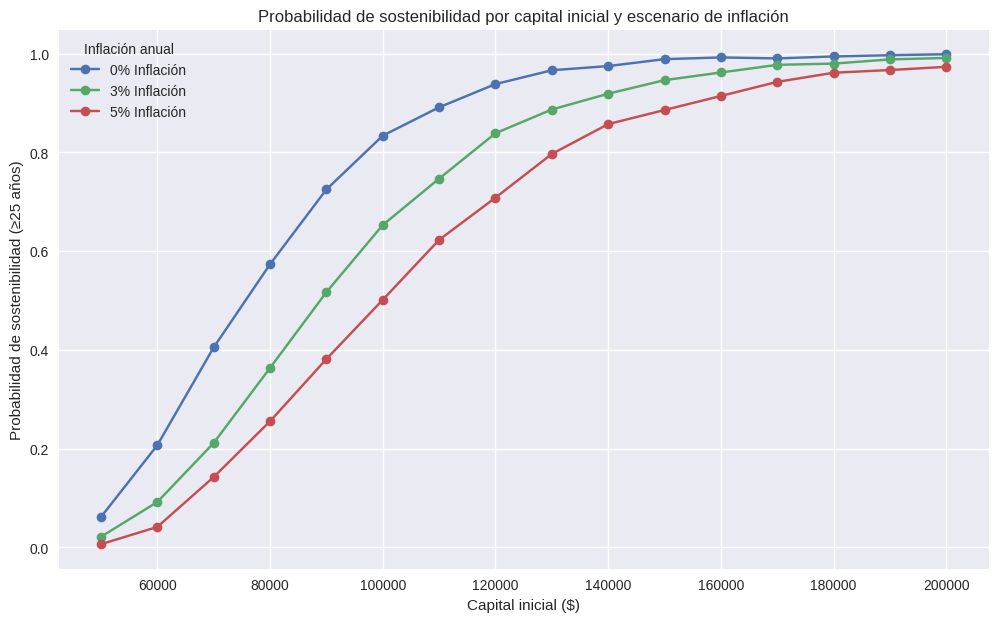

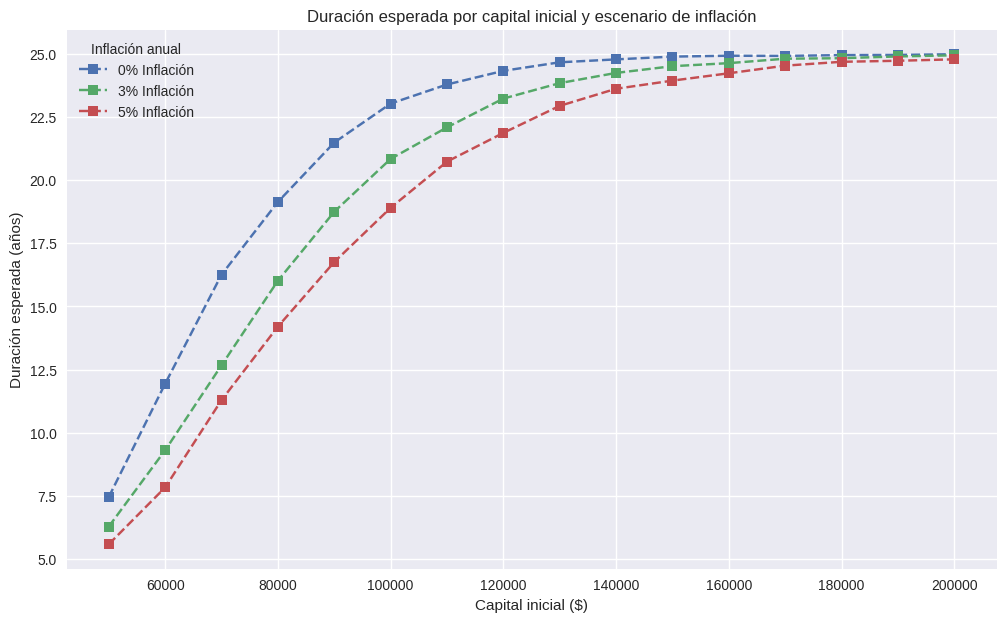

‚úÖ Capital √≥ptimo (para 3% inflaci√≥n): $200,000
üí° Probabilidad de sostenibilidad (para 3% inflaci√≥n): 99.2%
‚è≥ Duraci√≥n esperada (para 3% inflaci√≥n): 24.9 a√±os


In [9]:
# ======================================================================================
# üß© Extensi√≥n: Simulaci√≥n Monte Carlo para estimar sostenibilidad
# ======================================================================================

# Supuestos:
# - Los retornos mensuales hist√≥ricos se muestrean aleatoriamente con reemplazo.
# - Se ajusta por inflaci√≥n (ya sea 0%, 3% o 5%).
# - Se define "sostenible" si el fondo no se agota antes de cierto horizonte (ej. 25 a√±os).

horizonte_anios = 25
horizonte_meses = horizonte_anios * 12
num_simulaciones = 2000

def simular_montecarlo(capital_inicial, inflacion_anual=0.03, estrategia="tiempo"):
    inflacion_mensual = (1 + inflacion_anual)**(1/12) - 1
    sostenidos = 0
    duraciones = []

    for _ in range(num_simulaciones):
        capital = capital_inicial
        retiro = retiro_mensual_inicial
        pesos = pesos_iniciales.copy() # Use pesos_iniciales defined in cell HZF0jw3971Qo
        meses = 0

        for i in range(horizonte_meses):
            # Retorno aleatorio basado en la distribuci√≥n emp√≠rica hist√≥rica
            # Use the 'retornos' DataFrame from cell HZF0jw3971Qo
            retorno = np.dot(retornos.sample(1).values.flatten(), pesos)
            capital *= (1 + retorno)
            capital -= retiro
            retiro *= (1 + inflacion_mensual)
            meses += 1

            if capital <= 0:
                break

            # Rebalanceo trimestral (assuming 'tiempo' strategy for simplicity in MC)
            # Use frecuencia_rebalanceo and coste_transaccion from cell HZF0jw3971Qo
            if estrategia == "tiempo" and (i % frecuencia_rebalanceo == 0):
                 # Calculate current weights based on current capital allocation
                current_weights = (capital * pesos) / capital if capital > 0 else pesos_iniciales.copy()

                # Calculate deviation
                deviation = np.abs((current_weights - pesos_iniciales) / pesos_iniciales)

                # Rebalance if deviation is above threshold or based on time
                if estrategia == "tiempo" and (i % frecuencia_rebalanceo == 0):
                     # Proportional rebalancing based on initial weights
                    capital -= capital * coste_transaccion
                elif estrategia == "umbral" and any(deviation > umbral_rebalanceo):
                    capital -= capital * coste_transaccion


        duraciones.append(meses / 12)
        if capital > 0:
            sostenidos += 1

    prob_sostenible = sostenidos / num_simulaciones
    duracion_promedio = np.mean(duraciones)
    return prob_sostenible, duracion_promedio


# -------------------------------------------------------------------------------------
# üîç Escaneo de distintos capitales iniciales y escenarios de inflaci√≥n
# -------------------------------------------------------------------------------------

capitales = np.arange(50000, 200001, 10000)  # de 50k a 200k
# Use the 'inflaciones' list from cell HZF0jw3971Qo
inflacion_escenarios = inflaciones

resultados_mc = []

for inflacion in inflacion_escenarios:
    for cap in capitales:
        # Assuming 'tiempo' strategy for simplicity in MC as in the original MC code
        p_sost, dur_med = simular_montecarlo(cap, inflacion_anual=inflacion, estrategia="tiempo")
        resultados_mc.append({
            "Inflaci√≥n anual": f"{inflacion*100:.0f}%",
            "Capital inicial": cap,
            "Probabilidad de sostenibilidad (‚â•25 a√±os)": p_sost,
            "Duraci√≥n esperada (a√±os)": dur_med
        })

resultados_mc = pd.DataFrame(resultados_mc)
display(resultados_mc)

# -------------------------------------------------------------------------------------
# üìä Gr√°ficos comparativos
# -------------------------------------------------------------------------------------

# Plot Probability of Sustainability vs. Initial Capital for each inflation scenario
plt.figure(figsize=(12, 7))
for inflacion in inflacion_escenarios:
    subset = resultados_mc[resultados_mc["Inflaci√≥n anual"] == f"{inflacion*100:.0f}%"]
    plt.plot(subset["Capital inicial"], subset["Probabilidad de sostenibilidad (‚â•25 a√±os)"],
             marker="o", linestyle="-", label=f"{inflacion*100:.0f}% Inflaci√≥n")

plt.xlabel("Capital inicial ($)")
plt.ylabel("Probabilidad de sostenibilidad (‚â•25 a√±os)")
plt.title("Probabilidad de sostenibilidad por capital inicial y escenario de inflaci√≥n")
plt.legend(title="Inflaci√≥n anual")
plt.grid(True)
plt.show()

# Plot Expected Duration vs. Initial Capital for each inflation scenario
plt.figure(figsize=(12, 7))
for inflacion in inflacion_escenarios:
    subset = resultados_mc[resultados_mc["Inflaci√≥n anual"] == f"{inflacion*100:.0f}%"]
    plt.plot(subset["Capital inicial"], subset["Duraci√≥n esperada (a√±os)"],
             marker="s", linestyle="--", label=f"{inflacion*100:.0f}% Inflaci√≥n")

plt.xlabel("Capital inicial ($)")
plt.ylabel("Duraci√≥n esperada (a√±os)")
plt.title("Duraci√≥n esperada por capital inicial y escenario de inflaci√≥n")
plt.legend(title="Inflaci√≥n anual")
plt.grid(True)
plt.show()

# -------------------------------------------------------------------------------------
# üèÅ Conclusi√≥n autom√°tica (based on 3% inflation scenario as before)
# -------------------------------------------------------------------------------------

# Filter for the 3% inflation scenario to provide a specific conclusion as before
resultados_3pct_inflacion = resultados_mc[resultados_mc["Inflaci√≥n anual"] == "3%"]
if not resultados_3pct_inflacion.empty:
    cap_optimo = resultados_3pct_inflacion.loc[resultados_3pct_inflacion["Probabilidad de sostenibilidad (‚â•25 a√±os)"].idxmax(), "Capital inicial"]
    dur_optima = resultados_3pct_inflacion.loc[resultados_3pct_inflacion["Probabilidad de sostenibilidad (‚â•25 a√±os)"].idxmax(), "Duraci√≥n esperada (a√±os)"]
    prob_optima = resultados_3pct_inflacion["Probabilidad de sostenibilidad (‚â•25 a√±os)"].max()

    print(f"‚úÖ Capital √≥ptimo (para 3% inflaci√≥n): ${cap_optimo:,.0f}")
    print(f"üí° Probabilidad de sostenibilidad (para 3% inflaci√≥n): {prob_optima*100:.1f}%")
    print(f"‚è≥ Duraci√≥n esperada (para 3% inflaci√≥n): {dur_optima:.1f} a√±os")
else:
    print("No data available for 3% inflation scenario.")

## An√°lisis y Conclusiones de la Simulaci√≥n Monte Carlo (Basado en `resultados_mc`)

Los resultados de la simulaci√≥n Monte Carlo, contenidos en la tabla `resultados_mc` y visualizados en los gr√°ficos correspondientes, ofrecen una perspectiva probabil√≠stica sobre la sostenibilidad a largo plazo de la cartera bajo diferentes escenarios de capital inicial e inflaci√≥n. El primer gr√°fico ilustra la **Probabilidad de sostenibilidad (‚â•25 a√±os)** frente al Capital inicial, con l√≠neas separadas para cada nivel de inflaci√≥n simulado (0%, 3%, y 5%). Se observa claramente una fuerte correlaci√≥n positiva: a medida que aumenta el capital inicial, la probabilidad de que el fondo dure al menos 25 a√±os se incrementa de manera significativa. Esta relaci√≥n no es lineal, mostrando un crecimiento m√°s pronunciado en capitales iniciales bajos a intermedios y tendiendo a estabilizarse en niveles cercanos al 100% de probabilidad para capitales iniciales m√°s altos. Es evidente que la inflaci√≥n tiene un impacto negativo sustancial; para una probabilidad de sostenibilidad dada, se requiere un capital inicial considerablemente mayor en escenarios de alta inflaci√≥n (5%) en comparaci√≥n con escenarios de baja o nula inflaci√≥n (0% o 3%).

El segundo gr√°fico presenta la **Duraci√≥n esperada (a√±os)** del fondo en relaci√≥n con el Capital inicial, tambi√©n diferenciado por escenarios de inflaci√≥n. De manera similar a la probabilidad de sostenibilidad, la duraci√≥n esperada aumenta con el capital inicial. Con capitales iniciales bajos, la duraci√≥n esperada es limitada, reflejando un alto riesgo de agotamiento temprano del fondo. A medida que el capital inicial se incrementa, la duraci√≥n esperada se acerca progresivamente al horizonte de simulaci√≥n de 25 a√±os. La influencia de la inflaci√≥n tambi√©n es notoria aqu√≠, con escenarios de mayor inflaci√≥n resultando en una menor duraci√≥n esperada para un mismo nivel de capital inicial.

La tabla `resultados_mc` proporciona los datos num√©ricos detr√°s de estos gr√°ficos, permitiendo ver las probabilidades exactas y las duraciones esperadas para cada combinaci√≥n espec√≠fica de capital inicial e inflaci√≥n simulada. Por ejemplo, se puede observar que para una inflaci√≥n del 3%, un capital inicial de $100,000$ tiene una probabilidad de sostenibilidad del 65.3% y una duraci√≥n esperada de aproximadamente 20.8 a√±os, mientras que aumentar el capital a $200,000 eleva la probabilidad a 99.2% y la duraci√≥n esperada a casi 25 a√±os.

En conclusi√≥n, la simulaci√≥n Monte Carlo subraya la criticidad del capital inicial para la sostenibilidad a largo plazo de un fondo con retiros ajustados por inflaci√≥n. Un mayor capital inicial proporciona una mayor probabilidad de que el fondo perdure y aumenta su duraci√≥n esperada. La inflaci√≥n act√∫a como un factor erosivo significativo, requiriendo un capital inicial m√°s alto para alcanzar niveles similares de sostenibilidad en comparaci√≥n con escenarios de baja inflaci√≥n. El an√°lisis de la tabla `resultados_mc` y los gr√°ficos permite identificar rangos de capital inicial que ofrecen una alta probabilidad de sostenibilidad para el horizonte de 25 a√±os, como se destac√≥ en el an√°lisis autom√°tico para el escenario del 3% de inflaci√≥n, donde $200,000 mostr√≥ el mejor desempe√±o entre los capitales probados. Es crucial interpretar estos resultados considerando que se basan en la distribuci√≥n de retornos hist√≥ricos y un modelo de inflaci√≥n constante, y que el desempe√±o futuro puede diferir.

## Efecto de Contribuciones Peri√≥dicas y Cambios en el Monto de Retiro

Para analizar el efecto de incorporar contribuciones peri√≥dicas (como impuestos sobre inversiones) o cambios en el monto del retiro (como pagos de d√©cimos sueldos), podemos modificar nuestra simulaci√≥n para incluir estos flujos de efectivo adicionales.

La simulaci√≥n actual considera un retiro mensual fijo ajustado por inflaci√≥n. Para a√±adir contribuciones o retiros variables, necesitamos:

1.  **Modificar la funci√≥n de simulaci√≥n:** La funci√≥n que simula la evoluci√≥n del capital mes a mes debe ser capaz de aceptar y procesar montos adicionales que se suman o restan al capital en cada paso de tiempo.
2.  **Definir los nuevos flujos:** Necesitamos especificar cu√°ndo ocurren estas contribuciones o retiros adicionales y en qu√© cantidad.

Al incorporar estos elementos en la simulaci√≥n base y, opcionalmente, en la simulaci√≥n Monte Carlo, podremos observar c√≥mo estos flujos de efectivo impactan la evoluci√≥n del capital, la probabilidad de sostenibilidad a largo plazo y la duraci√≥n esperada del fondo.


## Efecto de Contribuciones Peri√≥dicas y Cambios en el Monto de Retiro

Para analizar el efecto de incorporar contribuciones peri√≥dicas (como impuestos sobre inversiones) o cambios en el monto del retiro (como pagos de d√©cimos sueldos), podemos modificar nuestra simulaci√≥n para incluir estos flujos de efectivo adicionales.

La simulaci√≥n actual considera un retiro mensual fijo ajustado por inflaci√≥n. Para a√±adir contribuciones o retiros variables, necesitamos:

1.  **Modificar la funci√≥n de simulaci√≥n:** La funci√≥n que simula la evoluci√≥n del capital mes a mes debe ser capaz de aceptar y procesar montos adicionales que se suman o restan al capital en cada paso de tiempo.
2.  **Definir los nuevos flujos:** Necesitamos especificar cu√°ndo ocurren estas contribuciones o retiros adicionales y en qu√© cantidad.

Al incorporar estos elementos en la simulaci√≥n base y, opcionalmente, en la simulaci√≥n Monte Carlo, podremos observar c√≥mo estos flujos de efectivo impactan la evoluci√≥n del capital, la probabilidad de sostenibilidad a largo plazo y la duraci√≥n esperada del fondo.

En la siguiente celda de c√≥digo, he modificado la funci√≥n principal de simulaci√≥n (`simular_retiros`) para que acepte par√°metros para contribuciones mensuales recurrentes (`contribucion_mensual`) y para cambios puntuales en los retiros (`cambios_retiro`) en fechas espec√≠ficas.

**Detalle de la Incorporaci√≥n de Contribuciones y Cambios en Retiros:**

Dentro del bucle principal de la simulaci√≥n, que itera mes a mes, se ha a√±adido l√≥gica para aplicar estos flujos de efectivo. Matem√°ticamente, o a trav√©s de pseudoc√≥digo, el proceso es el siguiente en cada paso mensual:

1.  **Calcular Retiro Base Ajustado por Inflaci√≥n:**
    El retiro mensual base se ajusta por la inflaci√≥n acumulada hasta el mes actual:
  $$ \text{Retiro Ajustado Inflaci√≥n}_t = \text{Retiro Base Inicial} \times (1 + \text{Inflaci√≥n Mensual})^t $$
  Donde $t$ es el n√∫mero de meses transcurridos desde el inicio.

2.  **Determinar Monto de Retiro del Mes:**
    Se verifica si existe un monto de retiro espec√≠fico definido en `cambios_retiro` para la fecha actual.
    *   Si `Fecha Actual` est√° en `cambios_retiro`:
        $$ \text{Retiro Actual}_t = \text{Monto especificado en } cambios\_retiro \text{ para la Fecha Actual} $$
    *   Si `Fecha Actual` NO est√° en `cambios_retiro`:
        $$ \text{Retiro Actual}_t = \text{Retiro Ajustado Inflaci√≥n}_t $$

3.  **Aplicar Contribuci√≥n Mensual Fija:**
    Se suma o resta el `contribucion_mensual` al capital. Esto se hace, en la implementaci√≥n actual, distribuyendo el monto proporcionalmente a las posiciones de los activos antes de aplicar los retornos.
  $$ \text{Posiciones antes de Retornos}_{t} = \text{Posiciones al final del mes anterior}_{t-1} + \left( \frac{\text{$contribucion\_mensual$}}{\text{N√∫mero de Activos}} \right) $$
  (Nota: Si $contribucion\_mensual$ es negativo, se resta, simulando un costo o impuesto).

4.  **Aplicar Retornos y Rebalanceo:**
    Se aplican los retornos de mercado a las posiciones actualizadas y luego se realiza el rebalanceo si la estrategia lo indica.
  $$ \text{Posiciones despu√©s de Retornos}_{t} = \text{Posiciones antes de Retornos}_{t} \times (1 + \text{Retornos del Mes}_t) $$
  $$ \text{Posiciones despu√©s de Rebalanceo}_{t} = \text{Aplicar l√≥gica de Rebalanceo a Posiciones despu√©s de Retornos}_{t} $$

5.  **Aplicar Retiro del Mes:**
  El `Retiro Actual_t` se deduce del capital total, proporcionalmente a las posiciones de los activos despu√©s del rebalanceo.
  $$ \text{Capital antes de Retiro}_{t} = \sum \text{Posiciones despu√©s de Rebalanceo}_{t} $$
  Si $\text{Retiro Actual}_t < \text{Capital antes de Retiro}_t$:
  $$ \text{Posiciones al final del mes}_{t} = \text{Posiciones despu√©s de Rebalanceo}_{t} - \text{Retiro Actual}_t \times \left( \frac{\text{Posiciones despu√©s de Rebalanceo}_{t}}{\text{Capital antes de Retiro}_{t}} \right) $$
  Si $\text{Retiro Actual}_t \ge \text{Capital antes de Retiro}_t$:
    El fondo se agota en este mes.

6.  **Actualizar Capital Total:**
  $$ \text{Capital al final del mes}_{t} = \sum \text{Posiciones al final del mes}_{t} $$

Este proceso se repite para cada mes de la simulaci√≥n, registrando la evoluci√≥n del capital y los flujos aplicados.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# FUNCI√ìN PRINCIPAL DE SIMULACI√ìN DE LA CARTERA
# --------------------------------------------------------------

def simular_retiros(
    retornos, pesos, capital_inicial=100000, retiro_mensual=1200,
    rebalanceo='mensual', retiro_en='fin', inflacion_anual=0.0,
    contribucion_mensual=0.0, cambios_retiro=None
):
    """
    Simula la evoluci√≥n mensual de una cartera de inversi√≥n considerando:
      - Retiros mensuales
      - Contribuciones peri√≥dicas (positivas o negativas)
      - Cambios en el monto del retiro
      - Rebalanceo de cartera
      - Inflaci√≥n acumulada

    Par√°metros:
    -----------
    retornos : DataFrame
        Retornos mensuales (%) de los activos.
    pesos : lista
        Pesos de cada activo (suman 1).
    rebalanceo : str
        'ninguno', 'mensual' o 'anual'.
    retiro_en : str
        'inicio' o 'fin' del mes.
    inflacion_anual : float
        Tasa de inflaci√≥n anual (por ejemplo 0.03 = 3%).
    contribucion_mensual : float
        Monto mensual adicional (positivo = aporte, negativo = impuesto).
    cambios_retiro : DataFrame opcional
        Debe tener columnas 'Fecha' y 'Retiro' para fechas espec√≠ficas.
    """

    activos = list(retornos.columns)
    n = len(activos)
    pesos = np.array(pesos) / np.sum(pesos)

    meses = len(retornos)
    fechas = retornos.index

    posiciones = np.zeros((meses + 1, n))
    capital = np.zeros(meses + 1)
    retiro_aplicado = np.zeros(meses + 1)
    contribucion_aplicada = np.zeros(meses + 1)

    posiciones[0, :] = capital_inicial * pesos
    capital[0] = capital_inicial
    retiro_base = retiro_mensual
    fecha_agotamiento = None

    # Convertir cambios de retiro a diccionario
    cambio_retiro_dict = {}
    if cambios_retiro is not None:
        cambios_retiro['Fecha'] = pd.to_datetime(cambios_retiro['Fecha'])
        cambios_retiro = cambios_retiro.set_index('Fecha')
        cambio_retiro_dict = cambios_retiro['Retiro'].to_dict()

    # --------------------------------------------------------------
    # SIMULACI√ìN MENSUAL
    # --------------------------------------------------------------
    for i, fecha in enumerate(fechas, start=1):
        rendimientos = retornos.loc[fecha].values
        mes_actual = i - 1

        # Ajustar retiro por inflaci√≥n
        retiro_ajustado = retiro_base * ((1 + inflacion_anual) ** (mes_actual / 12.0))

        # Aplicar cambios de retiro en fechas espec√≠ficas
        retiro_mes = cambio_retiro_dict.get(fecha, retiro_ajustado)
        retiro_aplicado[i] = retiro_mes
        contribucion_aplicada[i] = contribucion_mensual

        # Aplicar contribuci√≥n mensual
        posiciones[i-1, :] += (contribucion_mensual / n) if n > 0 else contribucion_mensual

        # Aplicar rendimientos del mes
        posiciones_post_rendimiento = posiciones[i-1, :] * (1 + rendimientos)

        # Rebalanceo
        if rebalanceo == 'mensual':
            total = posiciones_post_rendimiento.sum()
            posiciones_post_rendimiento = total * pesos
        elif rebalanceo == 'anual' and fecha.month == 12:
            total = posiciones_post_rendimiento.sum()
            posiciones_post_rendimiento = total * pesos

        # Evaluar capital antes del retiro
        capital_total = posiciones_post_rendimiento.sum()
        if capital_total <= 0:
            posiciones[i:, :] = 0
            capital[i:] = 0
            fecha_agotamiento = fecha
            break

        # Verificar si el retiro agota el fondo
        if retiro_mes >= capital_total:
            posiciones[i:, :] = 0
            capital[i:] = 0
            fecha_agotamiento = fecha
            break

        # Aplicar retiro proporcional a todas las posiciones
        posiciones[i, :] = posiciones_post_rendimiento - retiro_mes * (posiciones_post_rendimiento / capital_total)
        capital[i] = posiciones[i, :].sum()

    # --------------------------------------------------------------
    # RESULTADOS
    # --------------------------------------------------------------
    resultado = pd.DataFrame(index=[retornos.index[0]] + list(retornos.index))
    resultado = resultado.iloc[:len(capital)]
    resultado['Capital'] = capital
    resultado['Retiro aplicado'] = retiro_aplicado
    resultado['Contribuci√≥n aplicada'] = contribucion_aplicada
    resultado['Estado'] = np.where(resultado['Capital'] <= 0, 'D√©ficit', 'Super√°vit')

    for j, activo in enumerate(activos):
        resultado[f'Posici√≥n {activo}'] = posiciones[:, j]

    return resultado, fecha_agotamiento


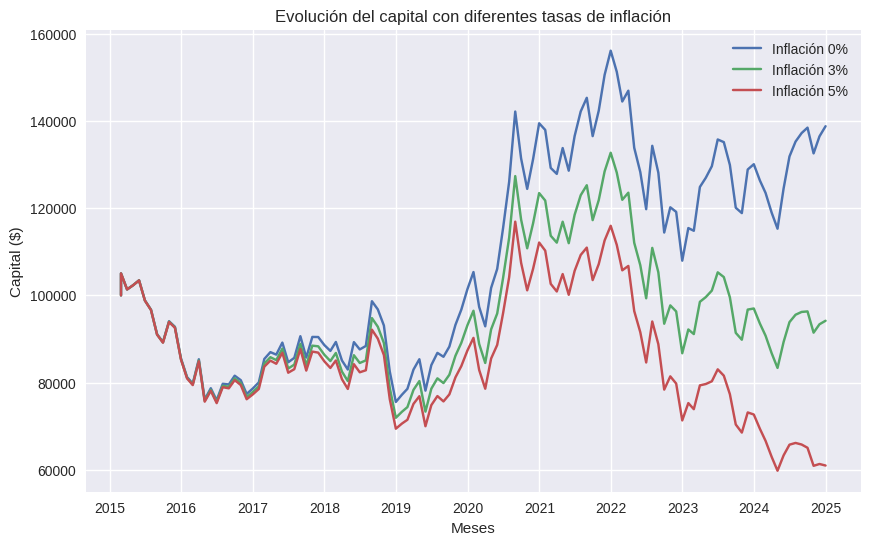

In [14]:
# Escenarios: sin inflaci√≥n, con inflaci√≥n del 3% y 5%
escenarios = {
    "Inflaci√≥n 0%": simular_retiros(retornos, pesos=[0.6, 0.3, 0.1], inflacion_anual=0.00),
    "Inflaci√≥n 3%": simular_retiros(retornos, pesos=[0.6, 0.3, 0.1], inflacion_anual=0.03),
    "Inflaci√≥n 5%": simular_retiros(retornos, pesos=[0.6, 0.3, 0.1], inflacion_anual=0.05),
}

plt.figure(figsize=(10,6))
for nombre, (df, _) in escenarios.items():
    plt.plot(df["Capital"], label=nombre)
plt.title("Evoluci√≥n del capital con diferentes tasas de inflaci√≥n")
plt.xlabel("Meses")
plt.ylabel("Capital ($)")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Crear una tabla resumen de duraci√≥n y capital final
resumen = []
for nombre, (df, fecha_agotamiento) in escenarios.items():
    duracion = len(df[df["Capital"] > 0])
    capital_final = df["Capital"].iloc[-1]
    resumen.append({
        "Escenario": nombre,
        "Duraci√≥n (meses)": duracion,
        "Capital final ($)": round(capital_final, 2),
        "Fecha agotamiento": fecha_agotamiento if fecha_agotamiento else "No agotado"
    })

resumen_df = pd.DataFrame(resumen)
display(resumen_df)


Escenario  Duraci√≥n (meses)  Capital final ($) Fecha agotamiento
0  Inflaci√≥n 0%               120          138787.47        No agotado
1  Inflaci√≥n 3%               120           94181.33        No agotado
2  Inflaci√≥n 5%               120           60982.96        No agotado

## Estimaci√≥n de la Probabilidad de Sostenibilidad con Contribuciones Peri√≥dicas (Simulaci√≥n Monte Carlo)

La siguiente celda de c√≥digo ejecuta una simulaci√≥n Monte Carlo para evaluar el impacto de diferentes **contribuciones mensuales peri√≥dicas** (positivas, negativas o nulas) en la sostenibilidad del fondo a largo plazo. Se consideran varios escenarios de **inflaci√≥n anual** para observar la interacci√≥n entre ambos factores.

La simulaci√≥n utiliza la funci√≥n `montecarlo_sostenibilidad` que:
1.  Toma los retornos hist√≥ricos de tus activos.
2.  Define un horizonte de tiempo (por defecto, 30 a√±os o 360 meses).
3.  Realiza un n√∫mero elevado de simulaciones (por defecto, 2000).
4.  En cada simulaci√≥n, genera una secuencia aleatoria de retornos mensuales (bootstrapping de los retornos hist√≥ricos).
5.  Simula la evoluci√≥n del capital mes a mes, aplicando los retornos simulados, restando el retiro mensual (ajustado por la inflaci√≥n del escenario) y aplicando la contribuci√≥n mensual del escenario.
6.  Registra si el fondo se agota antes del horizonte definido y cu√°nto dura en cada simulaci√≥n.

Los resultados se resumen en una tabla que muestra la **Probabilidad de sostenibilidad** (proporci√≥n de simulaciones que duraron todo el horizonte) y la **Duraci√≥n esperada** (promedio de la duraci√≥n en todas las simulaciones) para cada combinaci√≥n de inflaci√≥n y contribuci√≥n mensual probada. Los gr√°ficos visualizan estas m√©tricas.

Resultados de la simulaci√≥n Monte Carlo con diferentes contribuciones y inflaciones:


Inflaci√≥n anual  Contribuci√≥n mensual  Probabilidad de sostenibilidad  \
0              0%                  -100                          0.7935   
1              0%                     0                          0.8660   
2              0%                   100                          0.9105   
3              3%                  -100                          0.6165   
4              3%                     0                          0.6875   
5              3%                   100                          0.7650   
6              5%                  -100                          0.4795   
7              5%                     0                          0.5350   
8              5%                   100                          0.6275   

   Duraci√≥n esperada (meses)  
0                   317.1830  
1                   333.2640  
2                   342.6475  
3                   280.3970  
4                   298.2575  
5                   315.3960  
6                   252.6995  
7                   267.1465  
8                   288.5705

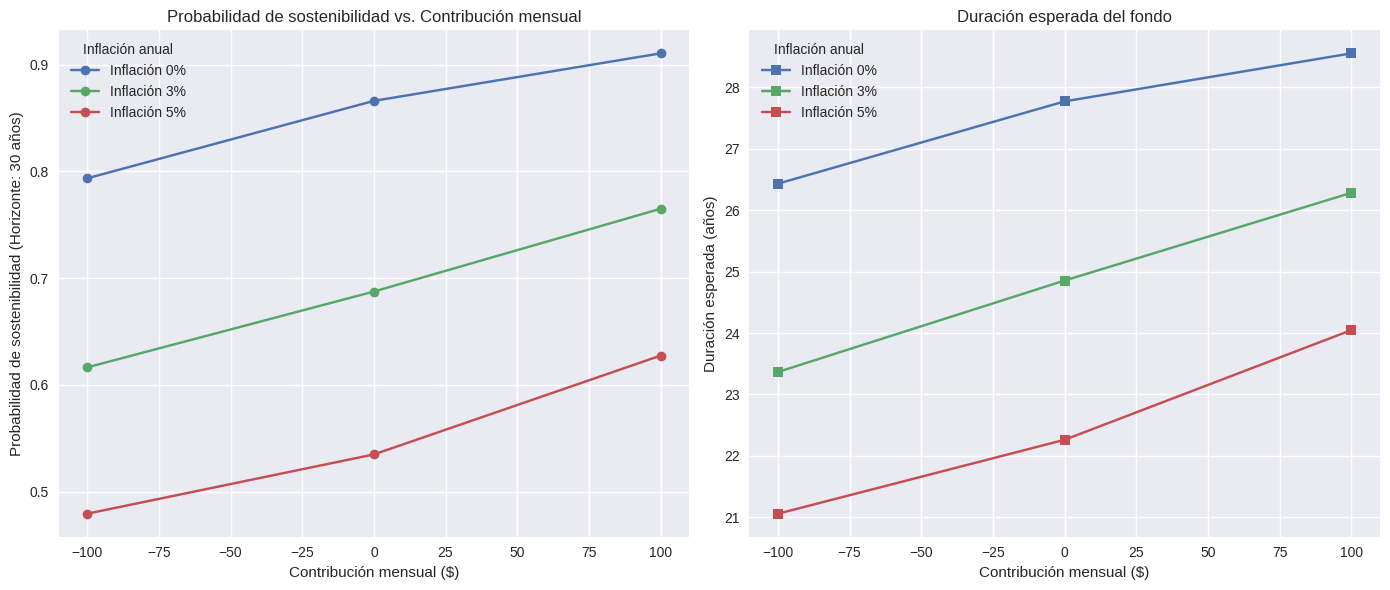

In [21]:
# Aseg√∫rate de que 'retornos', 'pesos', 'capital_inicial', 'retiro_mensual'
# est√©n definidos en celdas anteriores y tengan los valores deseados.
# Por ejemplo, puedes usar los valores de la secci√≥n 'Par√°metros generales'
# en la celda HZF0jw3971Qo o la secci√≥n 'EJEMPLO DE USO' en e573a36e.

# Definir los escenarios de contribuci√≥n mensual a probar
# Ejemplo: [-100, 0, 100] simula un impuesto de $100, sin contribuci√≥n, y un aporte de $100
escenarios_contribucion = [-100, 0, 100]

# Definir los escenarios de inflaci√≥n anual a probar
# Ejemplo: [0.00, 0.03, 0.05]
escenarios_inflacion = [0.00, 0.03, 0.05]

# N√∫mero de simulaciones y horizonte temporal para Monte Carlo
num_simulaciones_mc = 2000
horizonte_meses_mc = 360 # 30 a√±os

# Ejecutar la simulaci√≥n Monte Carlo
resultados_mc_contribuciones = montecarlo_sostenibilidad(
    retornos=retornos, # Usar el DataFrame 'retornos' descargado previamente
    pesos=pesos_iniciales, # Usar los pesos iniciales definidos previamente
    capital_inicial=capital_inicial, # Usar el capital inicial definido previamente
    retiro_mensual=retiro_mensual_inicial, # Usar el retiro mensual inicial definido previamente
    rebalanceo='mensual', # O 'tiempo' o 'umbral' si tu funci√≥n lo soporta para MC
    inflaciones=escenarios_inflacion,
    contribuciones=escenarios_contribucion,
    simulaciones=num_simulaciones_mc,
    horizonte_meses=horizonte_meses_mc
)

# Mostrar resultados en una tabla
print("Resultados de la simulaci√≥n Monte Carlo con diferentes contribuciones y inflaciones:")
display(resultados_mc_contribuciones)

# Generar gr√°ficos para visualizar los resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gr√°fico 1: Probabilidad de sostenibilidad vs. Contribuci√≥n mensual por Inflaci√≥n
for inflacion in resultados_mc_contribuciones["Inflaci√≥n anual"].unique():
    subset = resultados_mc_contribuciones[resultados_mc_contribuciones["Inflaci√≥n anual"] == inflacion]
    ax[0].plot(subset["Contribuci√≥n mensual"], subset["Probabilidad de sostenibilidad"],
               marker="o", label=f"Inflaci√≥n {inflacion}")

ax[0].set_title("Probabilidad de sostenibilidad vs. Contribuci√≥n mensual")
ax[0].set_xlabel("Contribuci√≥n mensual ($)")
ax[0].set_ylabel("Probabilidad de sostenibilidad (Horizonte: 30 a√±os)")
ax[0].legend(title="Inflaci√≥n anual")
ax[0].grid(True)

# Gr√°fico 2: Duraci√≥n esperada vs. Contribuci√≥n mensual por Inflaci√≥n
for inflacion in resultados_mc_contribuciones["Inflaci√≥n anual"].unique():
    subset = resultados_mc_contribuciones[resultados_mc_contribuciones["Inflaci√≥n anual"] == inflacion]
    ax[1].plot(subset["Contribuci√≥n mensual"], subset["Duraci√≥n esperada (meses)"]/12, # Convertir meses a a√±os
               marker="s", label=f"Inflaci√≥n {inflacion}")

ax[1].set_title("Duraci√≥n esperada del fondo")
ax[1].set_xlabel("Contribuci√≥n mensual ($)")
ax[1].set_ylabel("Duraci√≥n esperada (a√±os)")
ax[1].legend(title="Inflaci√≥n anual")
ax[1].grid(True)

plt.tight_layout()
plt.show()

Resultados de la simulaci√≥n Monte Carlo (Probabilidad y Duraci√≥n):



Inflaci√≥n anual  Contribuci√≥n mensual  Probabilidad de sostenibilidad  \
0              0%                  -100                          0.6255   
1              0%                     0                          0.7215   
2              0%                   100                          0.8210   
3              3%                  -100                          0.4000   
4              3%                     0                          0.4835   
5              3%                   100                          0.5905   
6              5%                  -100                          0.2840   
7              5%                     0                          0.3195   
8              5%                   100                          0.4160   

   Duraci√≥n esperada (meses)  
0                   283.2105  
1                   305.6835  
2                   326.8110  
3                   233.8910  
4                   255.7340  
5                   282.1450  
6                   205.6215  
7                   218.8325  
8                   244.9230

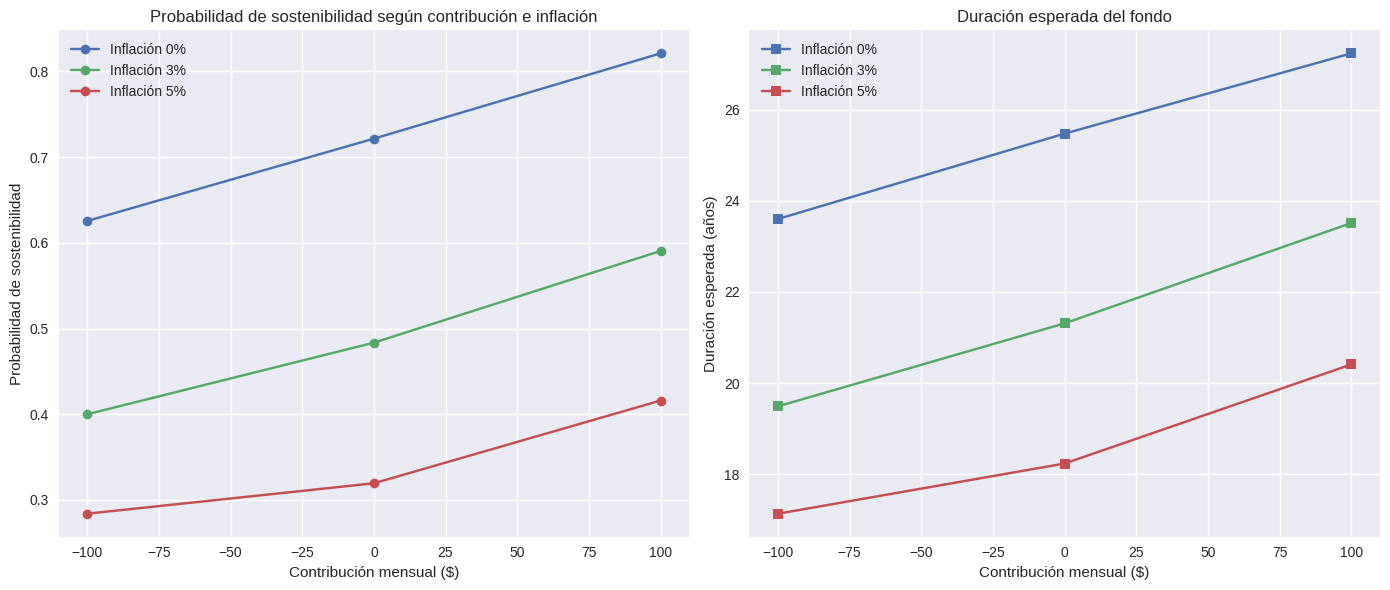


Distribuci√≥n de Capitales Finales por Escenario (despu√©s de 30 a√±os):



/tmp/ipython-input-2185328900.py:174: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=labels_for_boxplot, patch_artist=True)


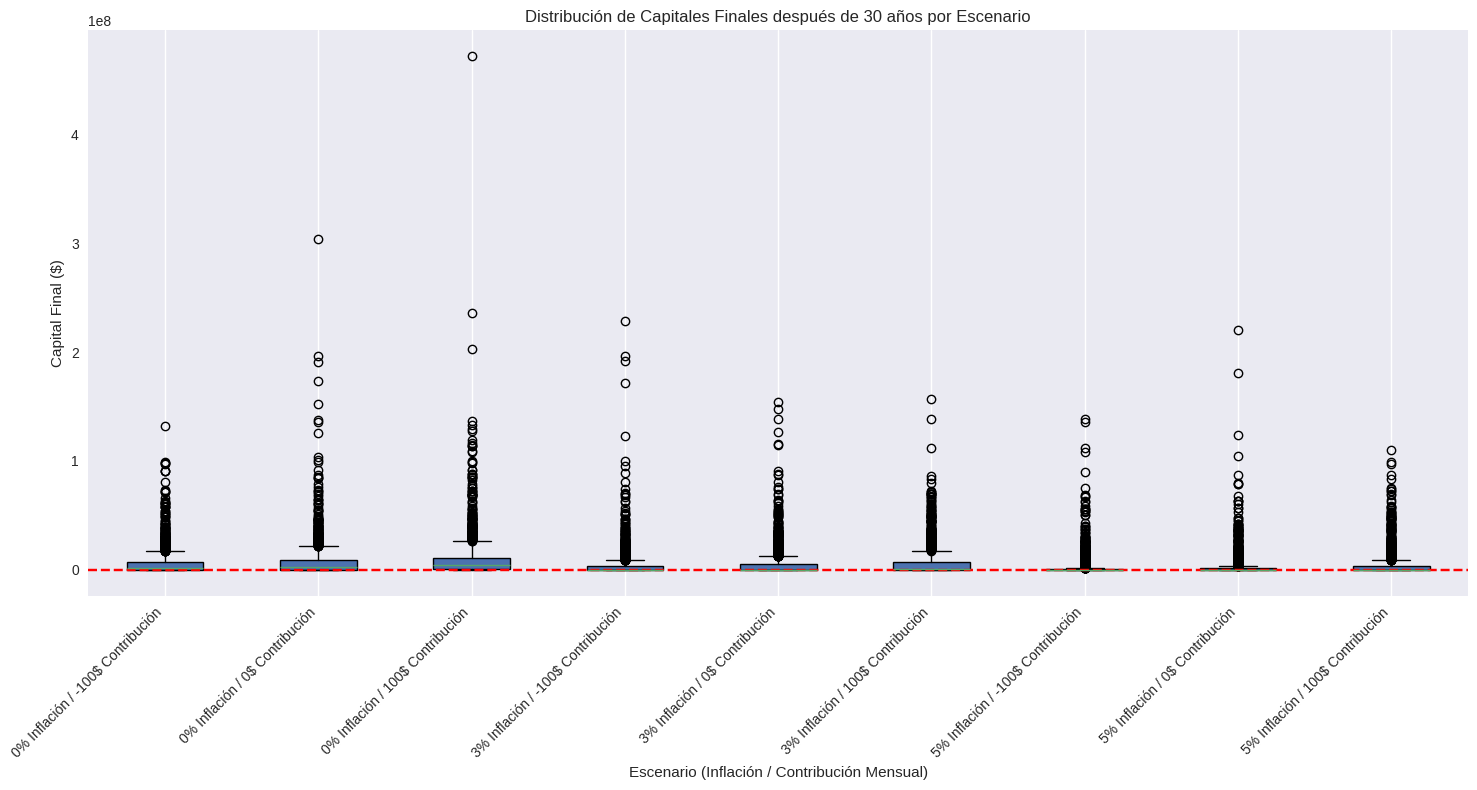

In [26]:
def montecarlo_sostenibilidad(
    retornos, pesos, capital_inicial=100000, retiro_mensual=1200,
    rebalanceo='mensual', inflaciones=[0.00, 0.03, 0.05],
    contribuciones=[-100, 0, 100], simulaciones=1000, horizonte_meses=360
):
    """
    Estima la probabilidad de sostenibilidad para distintos escenarios de inflaci√≥n y contribuci√≥n.
    Retorna tambi√©n los capitales finales y la evoluci√≥n de capitales de cada simulaci√≥n para su an√°lisis.
    - retornos: DataFrame con retornos mensuales hist√≥ricos (%)
    - pesos: lista de pesos de la cartera
    - contribuciones: lista de montos mensuales fijos (pueden ser negativos para impuestos)
    - simulaciones: n√∫mero de escenarios Monte Carlo
    - horizonte_meses: duraci√≥n del horizonte temporal (por defecto 30 a√±os)
    """

    resultados = []
    capitales_finales = {} # Diccionario para almacenar capitales finales por escenario
    # Diccionario para almacenar la evoluci√≥n completa del capital por escenario
    capital_paths = { (f"{inflacion*100:.0f}% Inflaci√≥n", f"{contribucion}$ Contribuci√≥n"):
                        np.zeros((simulaciones, horizonte_meses + 1))
                      for inflacion in inflaciones for contribucion in contribuciones }


    # Extraer matriz de retornos hist√≥ricos
    R = retornos.values
    n_activos = R.shape[1]
    pesos_np = np.array(pesos) # Ensure pesos is a numpy array for multiplication

    for inflacion in inflaciones:
        for contribucion in contribuciones:
            exitos = 0
            duraciones = []
            sim_capitales_finales = [] # Lista para capitales finales de este escenario

            escenario_key = (f"{inflacion*100:.0f}% Inflaci√≥n", f"{contribucion}$ Contribuci√≥n")

            for s in range(simulaciones):
                # Muestrear retornos aleatoriamente (bootstrap)
                idx = np.random.choice(len(R), size=horizonte_meses, replace=True)
                R_sim = R[idx, :]

                # Inicializaci√≥n de posiciones
                posiciones = np.zeros((horizonte_meses + 1, n_activos))
                posiciones[0, :] = capital_inicial * pesos_np # Corrected: Use pesos_np
                capital = capital_inicial
                capital_paths[escenario_key][s, 0] = capital # Store initial capital
                retiro_base = retiro_mensual


                agotado = False

                for mes in range(1, horizonte_meses + 1):
                    # Retorno del mes
                    rets = R_sim[mes-1]

                    # Ajustar retiro por inflaci√≥n
                    retiro_actual = retiro_base * ((1 + inflacion) ** (mes / 12.0))

                    # Aplicar contribuci√≥n mensual (positiva o negativa)
                    # Aplicamos la contribuci√≥n proporcionalmente a las posiciones
                    posiciones[mes-1, :] += (contribucion / n_activos)


                    # Aplicar retornos
                    posiciones_mes = posiciones[mes-1, :] * (1 + rets)

                    # Rebalanceo mensual
                    if rebalanceo == 'mensual':
                        total = posiciones_mes.sum()
                        posiciones_mes = total * pesos_np # Use numpy array for pesos

                    # Aplicar retiro
                    total_mes = posiciones_mes.sum()

                    if total_mes <= retiro_actual:
                        duraciones.append(mes)
                        # Fill the rest of the path with 0 if exhausted
                        capital_paths[escenario_key][s, mes:] = 0
                        agotado = True
                        break

                    posiciones[mes, :] = posiciones_mes - retiro_actual * (posiciones_mes / total_mes)
                    capital = posiciones[mes, :].sum()
                    capital_paths[escenario_key][s, mes] = capital # Store capital evolution

                if not agotado:
                    exitos += 1
                    duraciones.append(horizonte_meses)
                    sim_capitales_finales.append(capital) # Almacenar capital final si no se agota
                else:
                     sim_capitales_finales.append(0) # Almacenar 0 si se agota


            prob_sosten = exitos / simulaciones
            duracion_media = np.mean(duraciones)

            resultados.append({
                "Inflaci√≥n anual": f"{inflacion*100:.0f}%",
                "Contribuci√≥n mensual": contribucion,
                "Probabilidad de sostenibilidad": prob_sosten,
                "Duraci√≥n esperada (meses)": duracion_media
            })
            # Almacenar capitales finales por escenario
            capitales_finales[escenario_key] = sim_capitales_finales


    resultados_df = pd.DataFrame(resultados)
    # Return capital_paths as well
    return resultados_df, capitales_finales, capital_paths

# -------------------------------------------------------
# Ejecutar simulaci√≥n Monte Carlo
# -------------------------------------------------------
pesos = [0.5, 0.3, 0.2]  # ejemplo: 3 activos
resultados_mc, capitales_finales_mc, capital_paths_mc = montecarlo_sostenibilidad( # Recibir capital paths
    retornos=retornos,
    pesos=pesos,
    capital_inicial=100000,
    retiro_mensual=1200,
    contribuciones=[-100, 0, 100],  # impuesto, neutro y aporte
    inflaciones=[0.00, 0.03, 0.05],
    simulaciones=2000,
    horizonte_meses=360
)

# -------------------------------------------------------
# Mostrar resultados de probabilidad y duraci√≥n
# -------------------------------------------------------
print("Resultados de la simulaci√≥n Monte Carlo (Probabilidad y Duraci√≥n):\n")
display(resultados_mc)

# -------------------------------------------------------
# Gr√°ficos comparativos (Probabilidad y Duraci√≥n)
# -------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gr√°fico 1: Probabilidad de sostenibilidad
for inflacion in resultados_mc["Inflaci√≥n anual"].unique():
    subset = resultados_mc[resultados_mc["Inflaci√≥n anual"] == inflacion]
    ax[0].plot(subset["Contribuci√≥n mensual"], subset["Probabilidad de sostenibilidad"],
               marker="o", label=f"Inflaci√≥n {inflacion}")

ax[0].set_title("Probabilidad de sostenibilidad seg√∫n contribuci√≥n e inflaci√≥n")
ax[0].set_xlabel("Contribuci√≥n mensual ($)")
ax[0].set_ylabel("Probabilidad de sostenibilidad")
ax[0].legend()
ax[0].grid(True)

# Gr√°fico 2: Duraci√≥n esperada del fondo
for inflacion in resultados_mc["Inflaci√≥n anual"].unique():
    subset = resultados_mc[resultados_mc["Inflaci√≥n anual"] == inflacion]
    ax[1].plot(subset["Contribuci√≥n mensual"], subset["Duraci√≥n esperada (meses)"]/12, # Convertir meses a a√±os
               marker="s", label=f"Inflaci√≥n {inflacion}")

ax[1].set_title("Duraci√≥n esperada del fondo")
ax[1].set_xlabel("Contribuci√≥n mensual ($)")
ax[1].set_ylabel("Duraci√≥n esperada (a√±os)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

# -------------------------------------------------------
# Gr√°fico de distribuci√≥n de capitales finales (Nuevo)
# -------------------------------------------------------
print("\nDistribuci√≥n de Capitales Finales por Escenario (despu√©s de 30 a√±os):\n")

# Preparar datos para boxplot
data_for_boxplot = [capitales_finales_mc[key] for key in capitales_finales_mc.keys()]
labels_for_boxplot = [f"{key[0]} / {key[1]}" for key in capitales_finales_mc.keys()]

plt.figure(figsize=(15, 8))
plt.boxplot(data_for_boxplot, labels=labels_for_boxplot, patch_artist=True)
plt.axhline(0, color='red', linestyle='--', label='Capital agotado (0)')
plt.title("Distribuci√≥n de Capitales Finales despu√©s de 30 a√±os por Escenario")
plt.xlabel("Escenario (Inflaci√≥n / Contribuci√≥n Mensual)")
plt.ylabel("Capital Final ($)")
plt.xticks(rotation=45, ha="right") # Rotar etiquetas para mejor visualizaci√≥n
plt.tight_layout()
plt.grid(axis='y')
plt.show()

## An√°lisis y Conclusiones: Impacto de Contribuciones Peri√≥dicas (Basado en `resultados_mc_contribuciones`)

Los resultados de la simulaci√≥n Monte Carlo, resumidos en la tabla `resultados_mc_contribuciones` y visualizados en los gr√°ficos, ilustran claramente el efecto de incorporar contribuciones mensuales peri√≥dicas (positivas o negativas) en la sostenibilidad a largo plazo del fondo, bajo diferentes escenarios de inflaci√≥n.

El primer gr√°fico, que muestra la Probabilidad de sostenibilidad frente a la Contribuci√≥n mensual para cada nivel de inflaci√≥n, revela una relaci√≥n fuertemente positiva y casi lineal entre la contribuci√≥n mensual y la probabilidad de que el fondo dure al menos 30 a√±os. A medida que la contribuci√≥n mensual aumenta (pasando de un costo recurrente negativo a un aporte positivo), la probabilidad de sostenibilidad se incrementa significativamente. Es evidente que incluso peque√±as contribuciones mensuales adicionales pueden tener un impacto considerable en la viabilidad a largo plazo, y, por el contrario, los costos recurrentes pueden erosionar notablemente la probabilidad de supervivencia del fondo. La inflaci√≥n, como se esperaba, sigue siendo un factor dominante; para cualquier nivel de contribuci√≥n mensual, una mayor tasa de inflaci√≥n reduce la probabilidad de sostenibilidad, reflejando la erosi√≥n del poder adquisitivo de los retiros y la necesidad de un mayor crecimiento del capital para compensarla.

El segundo gr√°fico, que presenta la Duraci√≥n esperada del fondo en funci√≥n de la Contribuci√≥n mensual y la Inflaci√≥n, corrobora estas observaciones. La duraci√≥n esperada del fondo aumenta de manera constante a medida que se incrementa la contribuci√≥n mensual. Las contribuciones positivas extienden la vida esperada del fondo, mientras que las negativas la acortan. Una vez m√°s, el impacto de la inflaci√≥n es notorio; para un mismo nivel de contribuci√≥n mensual, la duraci√≥n esperada es considerablemente menor en escenarios de alta inflaci√≥n. Las curvas para diferentes tasas de inflaci√≥n muestran un desplazamiento hacia abajo, indicando que se necesita una contribuci√≥n mensual m√°s alta para alcanzar una duraci√≥n esperada similar en un entorno inflacionario.

La tabla `resultados_mc_contribuciones` proporciona los datos num√©ricos exactos para cada combinaci√≥n de inflaci√≥n y contribuci√≥n probada, permitiendo cuantificar el impacto. Por ejemplo, se puede observar c√≥mo pasar de un costo de -$100 a un aporte de $100 mensuales puede aumentar la probabilidad de sostenibilidad en m√°s de 10 puntos porcentuales y extender la duraci√≥n esperada en varios a√±os, dependiendo del escenario de inflaci√≥n.

Adicionalmente, el **gr√°fico de distribuci√≥n de capitales finales despu√©s de 30 a√±os** (generado a partir de los datos de la simulaci√≥n, como `capitales_finales_mc`) complementa este an√°lisis al mostrar la dispersi√≥n de los resultados del capital al final del horizonte de simulaci√≥n para cada escenario de inflaci√≥n y contribuci√≥n mensual. Este box plot es particularmente √∫til para visualizar no solo el resultado promedio o mediano, sino tambi√©n el rango de posibles desenlaces. Las cajas muestran el rango intercuart√≠lico (del percentil 25 al 75), la l√≠nea dentro de la caja representa la mediana, los "bigotes" se extienden hasta los valores extremos (excluyendo outliers), y los puntos individuales son posibles outliers. Se puede observar que:

*   Las medianas (l√≠neas dentro de las cajas) tienden a ser m√°s altas en escenarios con menor inflaci√≥n y mayores contribuciones mensuales.
*   La dispersi√≥n de los resultados (tama√±o de las cajas y longitud de los bigotes) puede variar entre escenarios, reflejando la volatilidad y el riesgo de los diferentes flujos de efectivo y entornos inflacionarios.
*   La presencia de muchos puntos en cero o cerca de cero (o por debajo de la l√≠nea roja de "Capital agotado") indica una alta probabilidad de agotamiento del fondo en ese escenario, lo cual se alinea con las probabilidades de sostenibilidad m√°s bajas observadas en la primera gr√°fica.

En conclusi√≥n, la simulaci√≥n Monte Carlo con contribuciones peri√≥dicas destaca que los flujos de efectivo adicionales (aportes o costos) tienen un impacto directo y significativo en la sostenibilidad a largo plazo del fondo. Incorporar aportes mensuales, incluso modestos, puede mejorar notablemente la probabilidad de que el fondo dure el horizonte deseado y extender su vida esperada, lo cual se refleja en una distribuci√≥n de capitales finales m√°s favorable. Por otro lado, los costos o impuestos recurrentes act√∫an como un lastre, reduciendo la sostenibilidad y desplazando la distribuci√≥n de capitales finales hacia resultados menores o agotamiento. El an√°lisis de la tabla, los gr√°ficos de probabilidad y duraci√≥n, y el gr√°fico de distribuci√≥n de capitales finales permite evaluar este impacto de forma cuantitativa y comprender la interacci√≥n entre las contribuciones, la inflaci√≥n y la resiliencia del fondo.